<a href="https://colab.research.google.com/github/twyeh/solid-state-physics/blob/main/%E6%99%AE%E9%83%8E%E5%85%8B%E9%BB%91%E9%AB%94%E8%BC%BB%E5%B0%84%E8%AD%9C%E7%B7%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 斯特藩-玻爾茲曼定律

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


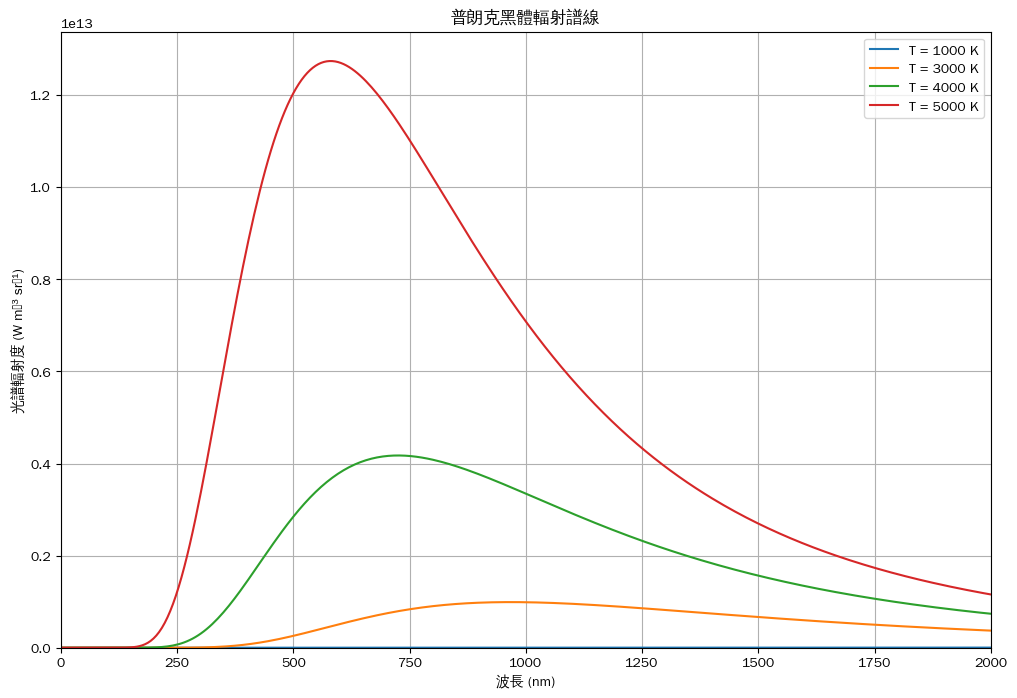

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# --- Font configuration for Chinese characters ---
# Install Chinese font if not already available
!apt-get -qq update > /dev/null
!apt-get -qq install fonts-wqy-zenhei > /dev/null
# Add the font to matplotlib's font manager
# Correcting the font path to a more common location for this package
fm.fontManager.addfont('/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc')
# Set matplotlib's default font to 'WenQuanYi Zen Hei'
plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']
# Ensure that minus signs are displayed correctly
plt.rcParams['axes.unicode_minus'] = False
# -------------------------------------------------

# Define physical constants
h = 6.626e-34  # Planck's constant (J s)
c = 3.0e8    # Speed of light (m/s)
k = 1.38e-23   # Boltzmann's constant (J/K)

# Define Planck's Law function
def planck_radiation(wavelength, temperature):
    # Wavelength in meters, temperature in Kelvin
    if wavelength <= 0 or temperature <= 0:
        return 0

    # Calculate the exponent term
    x = (h * c) / (wavelength * k * temperature)

    # Handle potential overflow for large x values (where radiance is effectively zero)
    if x > 700: # np.exp(700) is already a very large number, beyond which overflow might occur
        return 0.0

    term1 = (2 * h * c**2) / (wavelength**5)
    term2 = np.exp(x) - 1

    # Handle cases where term2 might be zero or extremely small (though with x > 700 check, this is less likely)
    if term2 == 0:
        return 0.0

    return term1 / term2

# Define temperatures in Kelvin
temperatures = [1000, 3000, 4000, 5000]

# Define wavelength range (in nanometers, then convert to meters for calculation)
wavelength_nm = np.linspace(1, 3000, 500) # From 1 nm to 3000 nm
wavelength_m = wavelength_nm * 1e-9 # Convert to meters

# Plotting
plt.figure(figsize=(12, 8))

for T in temperatures:
    # Calculate spectral radiance for each temperature
    radiance = [planck_radiation(lam, T) for lam in wavelength_m]
    plt.plot(wavelength_nm, radiance, label=f'T = {T} K')

plt.xlabel('波長 (nm)')
plt.ylabel('光譜輻射度 (W m⁻³ sr⁻¹)')
plt.title('普朗克黑體輻射譜線')
plt.legend()
plt.grid(True)
plt.xlim(0, 2000) # Adjust x-axis limits for better visualization
plt.ylim(bottom=0) # Ensure y-axis starts from 0
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) WenQuanYi Zen Hei.
  fig.canvas.print_figure(bytes_io, **kw)


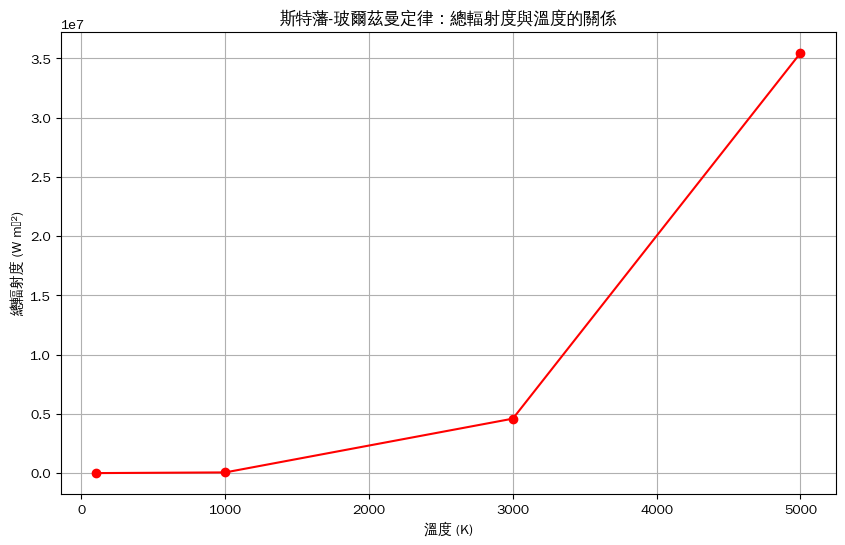

In [4]:
# Define Stefan-Boltzmann constant
sigma = 5.67e-8  # Stefan-Boltzmann constant (W m⁻² K⁻⁴)

# Define Stefan-Boltzmann Law function
def stefan_boltzmann_radiation(temperature):
    # Temperature in Kelvin
    if temperature <= 0:
        return 0
    return sigma * (temperature**4)

# Calculate total radiance for the defined temperatures
total_radiance = [stefan_boltzmann_radiation(T) for T in temperatures]

# Plotting total radiance vs. temperature
plt.figure(figsize=(10, 6))
plt.plot(temperatures, total_radiance, marker='o', linestyle='-', color='red')

plt.xlabel('溫度 (K)')
plt.ylabel('總輻射度 (W m⁻²)')
plt.title('斯特藩-玻爾茲曼定律：總輻射度與溫度的關係')
plt.grid(True)
plt.show()

### 普朗克黑體輻射譜線 (強度對頻率)

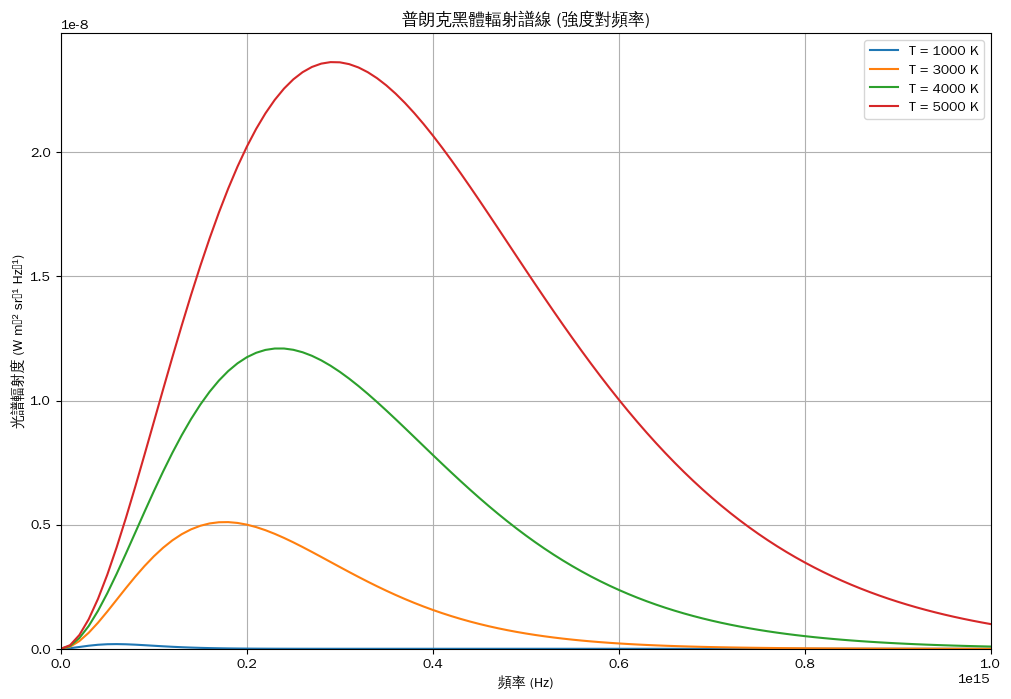

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Reuse font configuration for Chinese characters
# Add the font to matplotlib's font manager
fm.fontManager.addfont('/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc')
# Set matplotlib's default font to 'WenQuanYi Zen Hei'
plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']
# Ensure that minus signs are displayed correctly
plt.rcParams['axes.unicode_minus'] = False

# Reuse physical constants
h = 6.626e-34  # Planck's constant (J s)
c = 3.0e8    # Speed of light (m/s)
k = 1.38e-23   # Boltzmann's constant (J/K)

# Define Planck's Law function in terms of frequency (nu)
def planck_radiation_frequency(frequency, temperature):
    # Frequency in Hz, temperature in Kelvin
    if frequency <= 0 or temperature <= 0:
        return 0

    # Calculate the exponent term
    x = (h * frequency) / (k * temperature)

    # Handle potential overflow for large x values (where radiance is effectively zero)
    if x > 700:
        return 0.0

    term1 = (2 * h * frequency**3) / (c**2)
    term2 = np.exp(x) - 1

    if term2 == 0:
        return 0.0

    return term1 / term2

# Reuse temperatures from previous calculation
temperatures = [1000, 3000, 4000, 5000]

# Define frequency range (derived from wavelength range)
# Using the previously defined wavelength_nm range (1nm to 3000nm)
# Wavelength_m range was 1e-9 to 3e-6 meters
# Frequency = c / wavelength
# Max frequency: c / 1e-9 = 3e8 / 1e-9 = 3e17 Hz
# Min frequency: c / 3e-6 = 3e8 / 3e-6 = 1e14 Hz
frequency_hz = np.linspace(0, 1e17, 10000) # From ~100 THz to ~300 PHz

# Plotting
plt.figure(figsize=(12, 8))

for T in temperatures:
    # Calculate spectral radiance for each temperature
    radiance_freq = [planck_radiation_frequency(freq, T) for freq in frequency_hz]
    plt.plot(frequency_hz, radiance_freq, label=f'T = {T} K')

plt.xlabel('頻率 (Hz)')
plt.ylabel('光譜輻射度 (W m⁻² sr⁻¹ Hz⁻¹)')
plt.title('普朗克黑體輻射譜線 (強度對頻率)')
plt.legend()
plt.grid(True)
plt.xlim(0, 1e15) # Adjust x-axis limits for better visualization of peaks for lower temperatures
plt.ylim(bottom=0)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Use scientific notation for x-axis
plt.show()